# Reddit Climate Change - Data Understanding
Supervision: Prof. Dr. Jan Fabian Ehmke

Group members: Britz Luis, Huber Anja, Krause Felix Elias, Preda Yvonne-Nadine

Time: Summer term 2023 

Data: https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset

## Project Understanding
- What is the problem to be solved, what the expected benefit?
- How would a solution look like?
- Research question / project goal --> will be set after first data investigation and group discussion
- Legal limitations? Privacy limitations?

</br>

- How does Reddit work? What is a subcomment and a subreddit? Who is giving the name to a subreddit; the author of the subreddit?
- Does the score come from the reddit platform? What is it? F: Number of upvotes - downvotes
- Are there @ mentions in reddit posts?

### Information from Kaggle
- all the posts and comments on Reddit mentioning the terms "climate" and "change"
- the data does not include usernames.

Ideas:
- categorize positive and negative attitude reddits to intervene in case its a polarizing trend (but we already have the sentiment score); I did a similar thing in a previous project for tweets 
- Is this a logical AND for the two topic nouns? 


In [ ]:
# Preparing the environment
%pip install pandas
%pip install wordcloud
%pip install nltk
%pip install scikit-learn

In [1]:
# Loading packages
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing data
raw_comments = pd.read_csv('data/the-reddit-climate-change-dataset-comments.csv')#, nrows=1000) # FIXME Sample for start!
raw_posts = pd.read_csv('data/the-reddit-climate-change-dataset-posts.csv')#, nrows=1000)

In [30]:
# Extract single values and text
idx = 10
print(raw_comments.loc[idx])
print(raw_comments.loc[idx, "body"])

type                                                           comment
id                                                             imlch0h
subreddit.id                                                     2qh1i
subreddit.name                                               askreddit
subreddit.nsfw                                                   False
created_utc                                                 1661989961
permalink            https://old.reddit.com/r/AskReddit/comments/x2...
body                 That a big part of the solution to climate cha...
sentiment                                                       0.8937
score                                                                2
created_converted                            2022-08-31 23:52:41+00:00
created_date                                 2022-08-31 00:00:00+00:00
Name: 10, dtype: object
That a big part of the solution to climate change is population control. The world is already way beyond its carrying capaci

## Data Unterstanding
- What data is available?
- Is the data relevant to the problem?
- Is the data valid? Does it reflect expectations?
- Is data quality, quantity, recency sufficient?
- What do we need to take care of in data preparation?

### Comments Dataset

In [31]:
# Checking 'comments' dataset structure
raw_comments.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,created_converted,created_date
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2,2022-08-31 23:59:28+00:00,2022-08-31 00:00:00+00:00
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2,2022-08-31 23:59:00+00:00,2022-08-31 00:00:00+00:00
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1,2022-08-31 23:58:47+00:00,2022-08-31 00:00:00+00:00
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,Not just Sacramento. It's actually happening a...,0.0000,4,2022-08-31 23:57:58+00:00,2022-08-31 00:00:00+00:00
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,I think climate change tends to get some peopl...,0.6634,1,2022-08-31 23:56:46+00:00,2022-08-31 00:00:00+00:00


In [5]:
# Checking datatypes of 'comments' dataset
raw_comments.dtypes

type               object
id                 object
subreddit.id       object
subreddit.name     object
subreddit.nsfw       bool
created_utc         int64
permalink          object
body               object
sentiment         float64
score               int64
dtype: object

In [6]:
# Checking data ranges of 'comments' dataset
raw_comments.describe()

,created_utc,sentiment,score
count,4.600698e+06,4.543567e+06,4.600698e+06
mean,1.560607e+09,-5.827452e-03,9.552084e+00
std,7.576261e+07,6.581439e-01,1.157160e+02
min,1.262306e+09,-1.000000e+00,-2.379000e+03
25%,1.518140e+09,-6.369000e-01,1.000000e+00
50%,1.571668e+09,0.000000e+00,2.000000e+00
75%,1.622571e+09,6.249000e-01,5.000000e+00
max,1.661990e+09,1.000000e+00,3.638500e+04


In [40]:
# Duplicates based on comment text
raw_comments['body'].shape[0] - raw_comments['body'].drop_duplicates().shape[0]

# Count full duplicates
#raw_comments.shape[0] - raw_comments.drop_duplicates().shape[0]

0

In [7]:
# Convert comments timestamps and create a date column
raw_comments['created_converted'] = pd.to_datetime(raw_comments['created_utc'], utc=True, unit='s')
raw_comments['created_date'] = pd.to_datetime(raw_comments['created_converted']).dt.normalize() # gets rid of the timestamp inside the date
raw_comments["post_id"] = [link.split("/")[6] for link in raw_comments.permalink] # add corresponding post id

In [8]:
# Latest collected comment
print("The latest collected comment about 'climate change' is from ") 
max(raw_comments['created_converted'])

The latest collected comment about 'climate change' is from 


Timestamp('2022-08-31 23:59:28+0000', tz='UTC')

In [9]:
# Earliest collected comment
print("And the earliest is from ") 
min(raw_comments['created_converted'])

And the earliest is from 


Timestamp('2010-01-01 00:34:07+0000', tz='UTC')

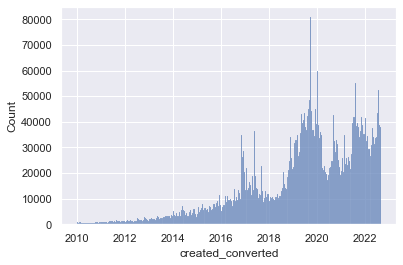

In [10]:
# Distribution of datapoints
sns.set(style="darkgrid")
sns.histplot(data=raw_comments, x="created_converted")
plt.show()

#### Learnings from Comments Dataset
- There is already a sentiment score, how is it created and what does it mean? what is the scale?
- The data is not equally distributed, there is way less data from the beginning of the tracking and more recent data, also there is a huge peak in the data, probably interesting to be explored

### Posts Dataset

In [11]:
# Checking 'posts' dataset structure
raw_posts.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,x2smmw,2vh0v,democraticsocialism,False,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15
1,post,x2slxy,2w844,nostupidquestions,False,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2
2,post,x2slk5,6wzx9b,eduwriters,False,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1
3,post,x2sbz6,46adh7,alternatitvereality,False,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1
4,post,x2sa2a,2qh1i,askreddit,False,1661989240,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1


In [12]:
# Checking datatypes of 'posts' dataset
raw_posts.dtypes

type              object
id                object
subreddit.id      object
subreddit.name    object
subreddit.nsfw      bool
created_utc        int64
permalink         object
domain            object
url               object
selftext          object
title             object
score              int64
dtype: object

In [13]:
# Checking data ranges of 'posts' dataset
raw_posts.describe()

,created_utc,score
count,6.209080e+05,620908.000000
mean,1.540695e+09,81.868678
std,7.738068e+07,1411.423764
min,1.262305e+09,0.000000
25%,1.497725e+09,1.000000
50%,1.557750e+09,1.000000
75%,1.588650e+09,5.000000
max,1.661990e+09,151210.000000


In [38]:
# Count full duplicates
raw_posts.shape[0] - raw_posts.drop_duplicates().shape[0]

0

In [14]:
# Convert post timestamps and create a date column
raw_posts['created_converted'] = pd.to_datetime(raw_posts['created_utc'], utc=True, unit='s')
raw_posts['created_date'] = pd.to_datetime(raw_posts['created_converted']).dt.normalize() # gets rid of the timestamp inside the date

In [15]:
# Latest collected post
print("The latest collected post about 'climate change' is from ") 
max(raw_posts['created_converted'])

The latest collected post about 'climate change' is from 


Timestamp('2022-08-31 23:57:17+0000', tz='UTC')

In [16]:
# Earliest collected post
print("And the earliest is from ") 
min(raw_posts['created_converted'])

And the earliest is from 


Timestamp('2010-01-01 00:12:30+0000', tz='UTC')

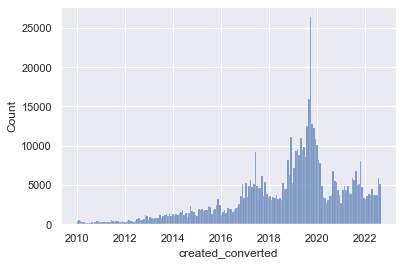

In [17]:
# Distribution of datapoints
sns.set(style="darkgrid")
sns.histplot(data=raw_posts, x="created_converted")
plt.show()

In [18]:
# Post types
distinct_post_types = raw_posts["type"].unique()
print("The posts dataset has only entries of type = 'post'. There is no other type of posts in reddit")

The posts dataset has only entries of type = 'post'. There is no other type of posts in reddit


In [19]:
# Domain types
distinct_domains = raw_posts["domain"].unique()
print("There are ")
print(len(distinct_domains))
print("different domains in the post dataset")

There are 
28707
different domains in the post dataset


In [20]:
print(raw_posts["selftext"].head())

0                                                  NaN
1    Ok so I was having a conversation with my neig...
2                                                  NaN
3                                                  NaN
4                                            [deleted]
Name: selftext, dtype: object


## Experiments

### Find large bot subreddits

In [ ]:
bot_reddits_comments_df = raw_comments[raw_comments['subreddit.name'].str.contains('bot',case=False)]

In [ ]:
bot_reddits_comments_df.groupby(["subreddit.name"])["id"].count().sort_values(ascending=False).head(20)

subreddit.name
bottown2               27435
bikinibottomtwitter     1603
subredditsummarybot      368
newsbotbot               274
botany                   212
explainbothsides         208
bottown22                166
u_anticensor_bot         138
mrrobot                  122
bottown                  119
bottown1                  65
bottowngarden             61
bottesting                40
shittyrobots              40
bottleneck                39
abbotsford                36
u_userleansbot            29
both_sides                28
robotics                  27
lovedeathandrobots        27
Name: id, dtype: int64

### Create bottown2 sample

In [ ]:
# Save samples
sample_comments = raw_comments[raw_comments["subreddit.name"] == "bottown2"]
sample_posts = raw_posts[raw_posts["subreddit.name"] == "bottown2"]

if not os.path.isfile("data/bottown_sample_comments.csv"):
    sample_comments.to_csv("data/bottown_sample_comments.csv")
else: 
    print("Warning file already exists")

if not os.path.isfile("data/bottown_sample_posts.csv"):
    sample_posts.to_csv("data/bottown_sample_posts.csv")
else: 
    print("Warning file already exists")

NameError: name 'raw_comments' is not defined

In [ ]:
# Loading sample
sample_comments = pd.read_csv("data/bottown_sample_comments.csv", index_col=0)
sample_comments = sample_comments.drop(["subreddit.id", "subreddit.name"], axis=1)

sample_posts = pd.read_csv("data/bottown_sample_posts.csv", index_col=0)
sample_posts = sample_posts.drop(["subreddit.id", "subreddit.name"], axis=1)

In [ ]:
unique_comments = sample_comments.body.unique()

In [ ]:
sum([1 if "Bernie" in i else 0 for i in unique_comments])

1350

In [ ]:
sample_comments["post_id"] = [i.split("/")[6] for i in sample_comments.permalink]

### Merging of both dataframes

In [ ]:
comments_post_id_set = set(sample_comments.post_id)
post_post_id_set = set(sample_posts.id)

len(comments_post_id_set & post_post_id_set)

6